In [11]:
from  keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [12]:
(x_train, _),(x_test, _) = mnist.load_data()


In [13]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [14]:
X_train = x_train.reshape(-1,28,28,1)
X_test = x_test.reshape(-1,28,28,1)

In [15]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


add noise into noiseless data 

In [17]:
noise_factor = 0.5
X_train_noisy = X_train+noise_factor*np.random.normal(0.0,1.0,X_train.shape)
X_test_noisy = X_test+noise_factor*np.random.normal(0.0,1.0,X_test.shape)

# CLipping 

In [19]:
X_train_noisy = np.clip(X_train_noisy, 
                       0.,1.)
X_test_noisy = np.clip(X_test_noisy, 0.,1.)


print(X_train_noisy.shape, X_test_noisy.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# PLotting

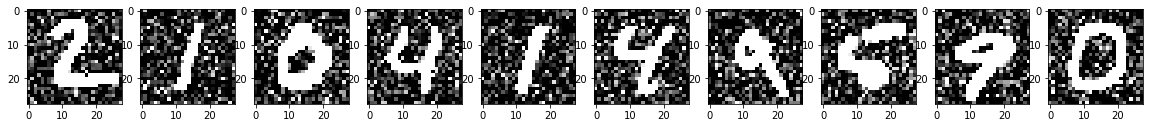

In [20]:
n = 10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
    sp = plt.subplot(1,n,i)
    plt.imshow(X_test_noisy[i].reshape(28,28))
    plt.gray()
plt.show()


Model(Auto Encoder )


In [24]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

In [26]:

input_img = Input(shape=(28,28,1))
x = Conv2D(32,(3,3),
          activation='relu',
          padding='same')(input_img)

x = MaxPool2D((2,2))(x)

x = Conv2D(32,(3,3), activation='relu',
          padding='same')(x)
encoded = MaxPool2D((2,2))(x)

x = UpSampling2D((2,2))(encoded)

x = Conv2D(32,(3,3),
          activation='relu',
          padding='same')(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(1,(3,3),padding='same',
                activation='sigmoid')(x)

autonencoder = Model(input_img,decoded)


autonencoder.compile(optimizer='adadelta',
                    loss = 'binary_crossentropy')

                   

Fitting Model

In [27]:
autonencoder.fit(X_train_noisy,X_train,
               validation_data=(X_test_noisy,X_test ),
                epochs=1,
                batch_size=128,
                shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 203s 3ms/step - loss: nan - val_loss: nan
